# Predictive Modeling with Python
Applying predictive modeling to a dataset of Covid Cases in Antioquia, Colombia.
Implementing Decision Trees and Logistic Regression methods as Machine Learning methods.

### Importing libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

### Data preparation

In [2]:
df_with_num_age = pd.read_csv('covid_antioquia_vnum.csv')
df_with_num_age.head(-10)

,Edad,Estado
0,18.0,Recuperado
1,0.0,Recuperado
2,0.0,Recuperado
3,0.0,Recuperado
4,1.0,Recuperado
...,...,...
310232,98.0,Fallecido
310233,98.0,Fallecido
310234,98.0,Fallecido
310235,98.0,Fallecido


In [3]:
df_with_num_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310247 entries, 0 to 310246
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Edad    310247 non-null  float64
 1   Estado  310247 non-null  object 
dtypes: float64(1), object(1)
memory usage: 4.7+ MB


In [4]:
# Changing data types
df_with_num_age['Estado']=df_with_num_age['Estado'].astype('category')
df_with_num_age['Edad']=df_with_num_age['Edad'].astype(np.int64)

df_with_num_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310247 entries, 0 to 310246
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   Edad    310247 non-null  int64   
 1   Estado  310247 non-null  category
dtypes: category(1), int64(1)
memory usage: 2.7 MB


<AxesSubplot:>

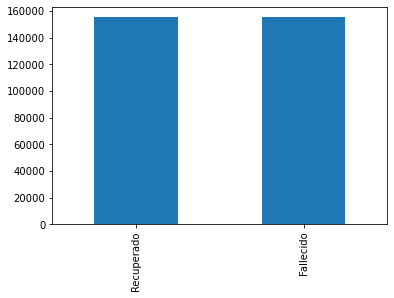

In [5]:
# Plotting the predictive variable Estado
df_with_num_age['Estado'].value_counts().plot(kind='bar')

In [6]:
# Encoding the dependent variable Estado
# Recuperado -> 1    Fallecido -> 0
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df_with_num_age['Estado']=labelencoder.fit_transform(df_with_num_age['Estado'])
df_with_num_age.head(-10)

,Edad,Estado
0,18,1
1,0,1
2,0,1
3,0,1
4,1,1
...,...,...
310232,98,0
310233,98,0
310234,98,0
310235,98,0


### Splitting the dataset

<AxesSubplot:>

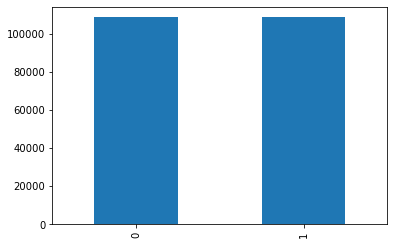

In [7]:
# 70-30 division
from sklearn.model_selection import train_test_split
X = df_with_num_age.drop('Estado', axis = 1) # dependent variables
Y = df_with_num_age['Estado'] # independent variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)
Y_train.value_counts().plot(kind='bar')

# Predictive Model: Decision Tree

### Creation of the Model with the training set

In [8]:
from sklearn import tree
model_Tree = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=2, max_depth=10)
model_Tree.fit(X_train, Y_train) # 0.7 set

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)

### Plotting the Tree

[Text(157.12718272900764, 207.55636363636364, 'Edad <= 55.5\ngini = 0.5\nsamples = 217172\nvalue = [108581, 108591]\nclass = Recuperado'),
 Text(105.06426526717559, 187.7890909090909, 'Edad <= 42.5\ngini = 0.235\nsamples = 106219\nvalue = [14418, 91801]\nclass = Recuperado'),
 Text(73.07776717557253, 168.0218181818182, 'Edad <= 32.5\ngini = 0.116\nsamples = 75744\nvalue = [4665, 71079]\nclass = Recuperado'),
 Text(57.98301526717558, 148.25454545454545, 'Edad <= 30.5\ngini = 0.057\nsamples = 46990\nvalue = [1375, 45615]\nclass = Recuperado'),
 Text(49.51717557251909, 128.48727272727274, 'Edad <= 27.5\ngini = 0.063\nsamples = 40741\nvalue = [1335, 39406]\nclass = Recuperado'),
 Text(40.252671755725196, 108.72, 'Edad <= 24.5\ngini = 0.047\nsamples = 30408\nvalue = [732, 29676]\nclass = Recuperado'),
 Text(29.390839694656492, 88.95272727272729, 'Edad <= 22.5\ngini = 0.054\nsamples = 20850\nvalue = [576, 20274]\nclass = Recuperado'),
 Text(20.44580152671756, 69.18545454545455, 'Edad <= 15.5

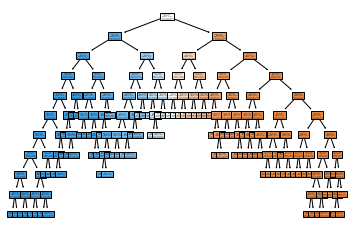

In [9]:
from sklearn.tree import plot_tree
variable_names=X_train.columns.values
class_names=labelencoder.classes_
plot_tree(model_Tree, feature_names=variable_names, class_names=class_names, filled=True)

### Evaluation of the model with the test set

In [10]:
Y_pred = model_Tree.predict(X_test)

from sklearn.metrics import accuracy_score
acc=accuracy_score(Y_test, Y_pred)
print(acc)

0.8561267794789148


In [11]:
from sklearn import metrics

print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

              precision    recall  f1-score   support

   Fallecido       0.86      0.86      0.86     46536
  Recuperado       0.86      0.86      0.86     46539

    accuracy                           0.86     93075
   macro avg       0.86      0.86      0.86     93075
weighted avg       0.86      0.86      0.86     93075



### Confusion matrix

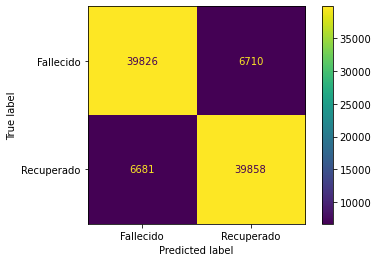

In [12]:
from sklearn import metrics
metrics.plot_confusion_matrix(estimator=model_Tree, X=X_test, y_true=Y_test, display_labels=labelencoder.classes_,values_format='d')  

plt.show()

### ROC Curve

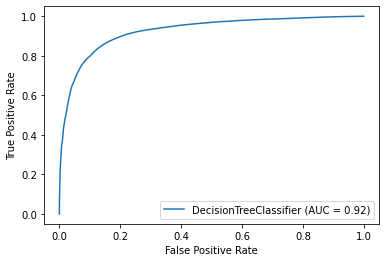

In [13]:
metrics.plot_roc_curve(estimator=model_Tree, X=X_test, y=Y_test)  

plt.show() 

------------------------------------------------------------------------
# Predictive Model: Logistic Regression

### Creation of the Model with the training set

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,Y_train)
Y_pred=logistic_regression.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

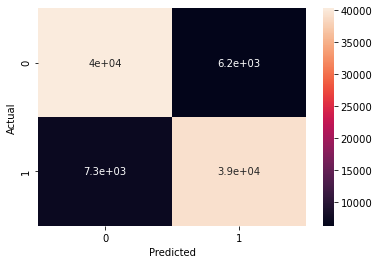

In [15]:
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [16]:
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

Accuracy:  0.8549341928552243


### ROC Curve

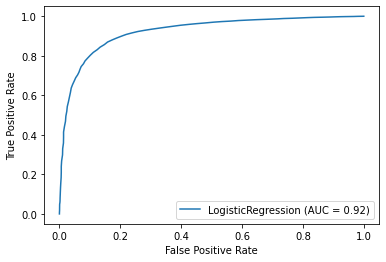

In [17]:
metrics.plot_roc_curve(estimator=logistic_regression, X=X_test, y=Y_test)  

plt.show() 